In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


In [2]:
# Visualize the dataset

# Step 1: read the file
filename = '/kaggle/input/diabetes-dataset/diabetes2.csv'
from pandas import read_csv
df = read_csv(filename)
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
    bad = (df[column] == 0)
    df.loc[bad, column] = None


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
# Create normalized dataset
normalized = (df - df.mean()) / df.std()
normalized["Outcome"] = (normalized["Outcome"] > 0)
# normalized.describe()
normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 48.9 KB


In [6]:
def get_mean_values(df):
    # print(df.head())
    mean = df.mean(axis=0)
    mean = mean + 2.0
    return mean

def get_std_deviation(df):
    std_dev = df.std()
    return std_dev


def get_bar_plot_data(normalized_dataset, output_label):
    bar_plot_mean_dict = {}
    bar_plot_stddev_dict = {}
    col_list = list(normalized_dataset.columns)
    col_list.remove(output_label)
    non_diabetic = normalized_dataset.loc[normalized_dataset[output_label] == 0]
    diabetic = normalized_dataset.loc[normalized_dataset[output_label] == 1] 
    bar_plot_mean_dict["diabetic"] = {}
    bar_plot_mean_dict["non-diabetic"] = {}
    bar_plot_stddev_dict["diabetic"] = {}
    bar_plot_stddev_dict["non-diabetic"] = {}
    for column in col_list:
        mean_y0 = get_mean_values(non_diabetic[column])
        mean_y1 = get_mean_values(diabetic[column])
        stddev_y0 = get_std_deviation(non_diabetic[column])
        stddev_y1 = get_std_deviation(diabetic[column])
        bar_plot_mean_dict["non-diabetic"][column] = mean_y0
        bar_plot_mean_dict["diabetic"][column] = mean_y1
        bar_plot_stddev_dict["non-diabetic"][column] = stddev_y0
        bar_plot_stddev_dict["diabetic"][column] = stddev_y1
    return bar_plot_mean_dict, bar_plot_stddev_dict
        

{'Pregnancies': 2.302892391708013, 'Glucose': 2.6756951997333616, 'BloodPressure': 2.2355198784670467, 'SkinThickness': 2.367145831768641, 'Insulin': 2.4318885384157496, 'BMI': 2.4258928829133994, 'DiabetesPedigreeFunction': 2.23729825647447, 'Age': 2.3253574344350882}


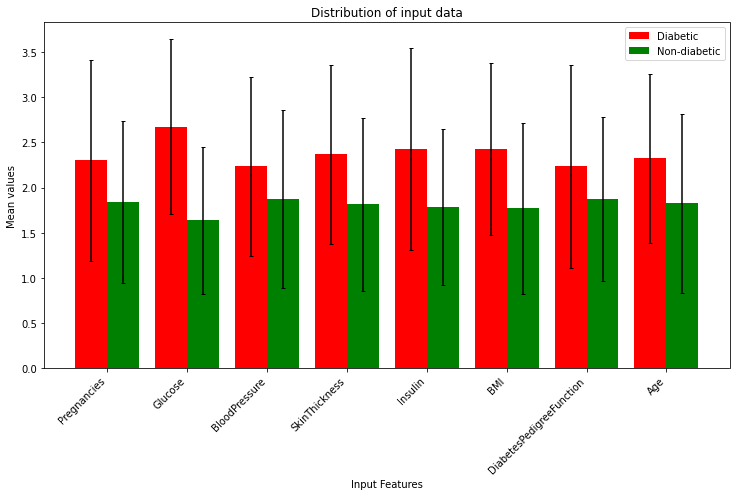

In [7]:
# Step 1: Use Bar plot to compare feature values by outcome
# X - labels are the column names
# Y - values are the mean of the column + 2.0
import matplotlib.pyplot as plt
mean_dict, stddev_dict = get_bar_plot_data(normalized, "Outcome")
input_features = mean_dict["diabetic"].keys()
X_axis = np.arange(len(input_features))
y_values_y1 = mean_dict["diabetic"].values()
y_values_y0 = mean_dict["non-diabetic"].values()
error_y1 = list(stddev_dict["diabetic"].values())
error_y0 = list(stddev_dict["non-diabetic"].values())
print(mean_dict["diabetic"])
fig = plt.figure(figsize = (20, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(1,2,1)
ax1.bar(X_axis - 0.2, y_values_y1, color ='red',
        width = 0.4, label='Diabetic')
ax1.errorbar(X_axis - 0.2, y_values_y1, yerr=error_y1, fmt='none', ecolor = 'black', capsize=2.0, 
             capthick=1.0)
plt.bar(X_axis + 0.2, y_values_y0, color='green', width=0.4, label='Non-diabetic')
plt.errorbar(X_axis + 0.2, y_values_y0, yerr=error_y0, fmt='none', ecolor = 'black', capsize=2.0, 
             capthick=1.0)
plt.xlabel("Input Features")
plt.ylabel("Mean values")
plt.title("Distribution of input data")
plt.xticks(X_axis, input_features, rotation=45, ha="right")
plt.legend(loc="upper right", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


*The main conclusions we can draw from the plot is that although a lot of variables are indicators for diabetic vs non-diabetic, none of them is a clear indicator. This is because there is significant overlap within 1 standard deviation among the two classes of people.*

In [8]:
# Functions for histogram (Step -2)
def plot_histogram(diabetic, non_diabetic, x_label):
    # Find the number of bins 
    nbins = 40
    import matplotlib.pyplot as plt 
    plt.hist(diabetic, bins=nbins, histtype="stepfilled", density=True, color='red', alpha=0.5, label='Diabetic')
    plt.hist(non_diabetic, bins=nbins, histtype="stepfilled", density=True, color='green', alpha=0.5, label='Non-Diabetic')
    plt.legend()
    plt.xlabel(x_label)
    plt.show()

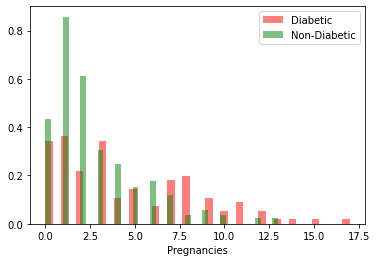

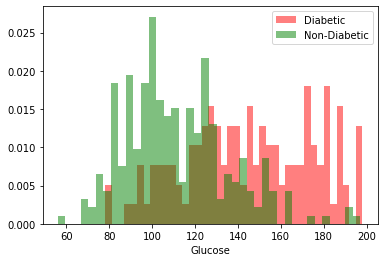

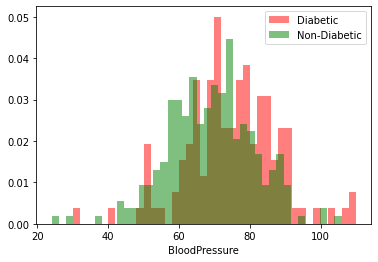

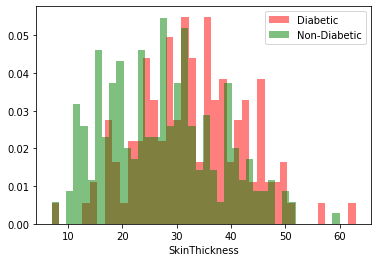

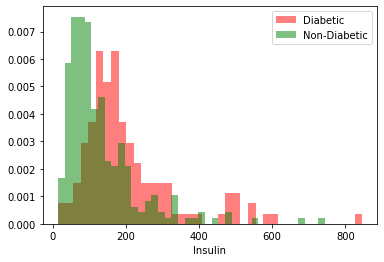

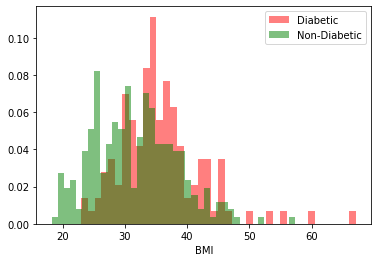

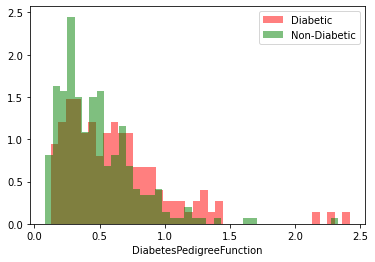

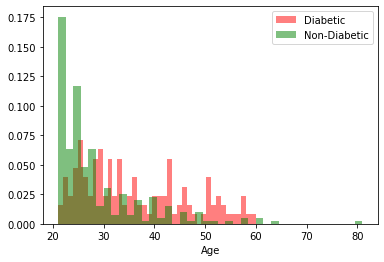

In [9]:
# Step 2 - Draw histogram
output_label="Outcome"
df2 = df.copy()
# Remove rows where feature values are missing
df2.dropna(inplace=True) 
df2["Outcome"] = (df2["Outcome"] > 0)
col_list = list(df2.columns)
col_list.remove(output_label)
non_diabetic = df2.loc[df2[output_label] == 0]
diabetic = df2.loc[df2[output_label] == 1]
for feature in col_list:
    x_data_diabetic = list(diabetic[feature])
    x_data_non_diabetic = list(non_diabetic[feature])
    # print(x_data)
    plot_histogram(x_data_diabetic, x_data_non_diabetic, feature)

By seeing the histograms here, we can conclude that the data of DiabetesPedigreeFunction, BMI, Blood Pressure and Insulin are uniformly distributed. For Glucose, the modal value (value that occurs the most) in case of diabetic patients is 177, and in case of non-diabetic patients is 90.

<AxesSubplot:>

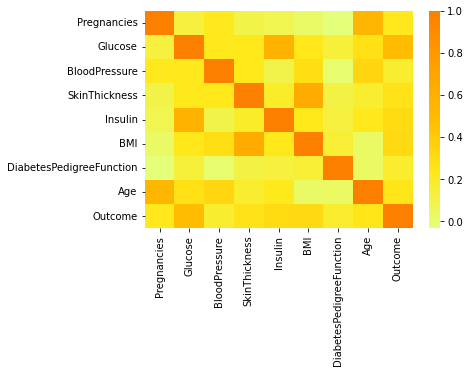

In [10]:
# Task 3 : Draw heatmap to find pairs of correlated features
import seaborn as sns
#Important: Heatmap is drawn using CORRELATION MATRIX OF DATASET.
# It's highly important that you find the correlation matrix first.
dataset = df.corr()
sns.heatmap(dataset, cmap="Wistia")